<a href="https://colab.research.google.com/github/ppeinadox/prediccion_nasdaq/blob/main/TFM_Patricia_Peinado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Preprocesamiento de los datos**



In [1]:
from google.colab import files
import pandas as pd

uploaded = files.upload()
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)
print(df.head())

Saving Datos históricos del Nasdaq 100.csv to Datos históricos del Nasdaq 100.csv
        Fecha     Último   Apertura     Máximo     Mínimo     Vol.  % var.
0  27.02.2025  20.550,95  21.281,36  21.322,39  20.541,56  436,74M  -2,75%
1  26.02.2025  21.132,92  21.170,51  21.350,52  21.012,62  346,42M   0,22%
2  25.02.2025  21.087,24  21.318,77  21.326,81  20.930,58  409,08M  -1,24%
3  24.02.2025  21.352,08  21.669,36  21.727,58  21.341,96  395,00M  -1,21%
4  21.02.2025  21.614,08  22.110,54  22.115,21  21.597,16  396,39M  -2,06%


In [2]:
df = df.drop(columns=["% var."])

In [3]:
df["Fecha"] = pd.to_datetime(df["Fecha"], format="%d.%m.%Y")

print(df.dtypes)


Fecha       datetime64[ns]
Último              object
Apertura            object
Máximo              object
Mínimo              object
Vol.                object
dtype: object


In [4]:
df["Vol."] = df["Vol."].astype(str)
df["Vol."] = df["Vol."].str.replace(",", ".", regex=False)
df["Vol."] = df["Vol."].str.replace("M", "*1e6", regex=False)
df["Vol."] = df["Vol."].str.replace("B", "*1e9", regex=False)
df["Vol."] = df["Vol."].map(pd.eval)

print(df[["Vol."]].head())
print(df.dtypes)


          Vol.
0  436740000.0
1  346420000.0
2  409080000.0
3  395000000.0
4  396390000.0
Fecha       datetime64[ns]
Último              object
Apertura            object
Máximo              object
Mínimo              object
Vol.               float64
dtype: object


In [5]:
columnas_numericas = ["Último", "Apertura", "Máximo", "Mínimo"]
for col in columnas_numericas:
    df[col] = df[col].astype(str)
    df[col] = df[col].str.replace(".", "", regex=False)
    df[col] = df[col].str.replace(",", ".", regex=False)

df[columnas_numericas] = df[columnas_numericas].astype(float)

print(df.dtypes)


Fecha       datetime64[ns]
Último             float64
Apertura           float64
Máximo             float64
Mínimo             float64
Vol.               float64
dtype: object


In [6]:
print(df.isnull().sum())

Fecha       0
Último      0
Apertura    0
Máximo      0
Mínimo      0
Vol.        0
dtype: int64


In [7]:
df = df.sort_values(by="Fecha")
print(df.tail())

       Fecha    Último  Apertura    Máximo    Mínimo         Vol.
4 2025-02-21  21614.08  22110.54  22115.21  21597.16  396390000.0
3 2025-02-24  21352.08  21669.36  21727.58  21341.96  395000000.0
2 2025-02-25  21087.24  21318.77  21326.81  20930.58  409080000.0
1 2025-02-26  21132.92  21170.51  21350.52  21012.62  346420000.0
0 2025-02-27  20550.95  21281.36  21322.39  20541.56  436740000.0


In [8]:
df.to_csv("nasdaq100_limpio.csv", index=False, encoding="utf-8")

**Análisis exploratorio de datos(EDA)**

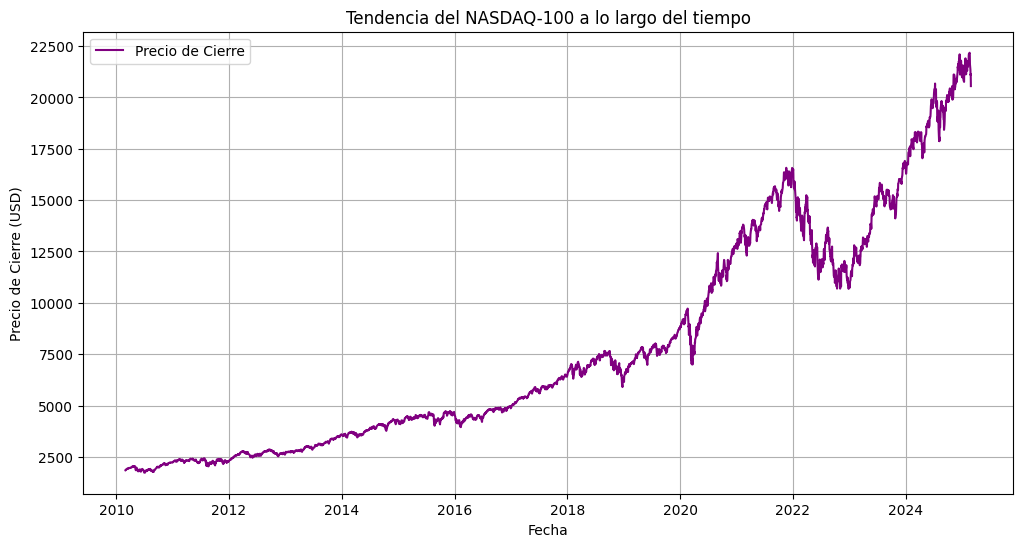

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(df['Fecha'], df['Último'], label='Precio de Cierre', color='purple')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre (USD)')
plt.title('Tendencia del NASDAQ-100 a lo largo del tiempo')
plt.legend()
plt.grid(True)
plt.show()


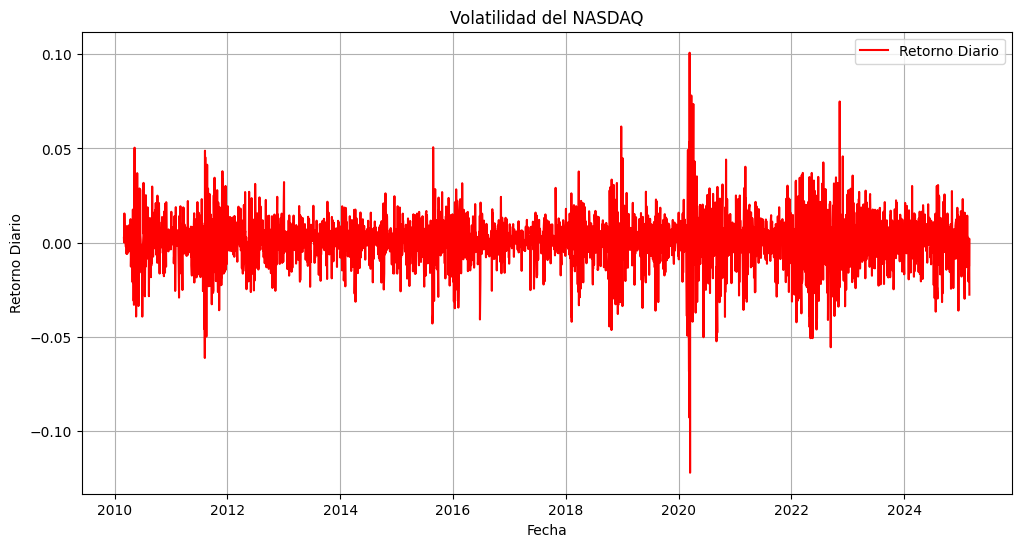

In [10]:
df2 = df
df2['Daily Return'] = df2['Último'].pct_change()

plt.figure(figsize=(12,6))
plt.plot(df2['Fecha'], df2['Daily Return'], label='Retorno Diario', color='red')
plt.xlabel('Fecha')
plt.ylabel('Retorno Diario')
plt.title('Volatilidad del NASDAQ')
plt.legend()
plt.grid(True)
plt.show()

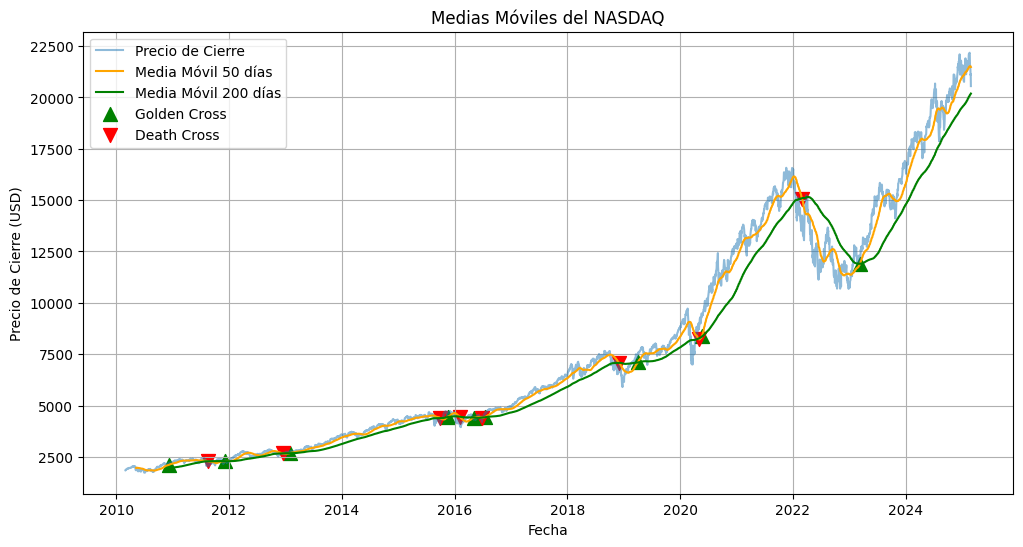

In [11]:
import numpy as np
import matplotlib.pyplot as plt

df['MA50'] = df['Último'].rolling(window=50).mean()
df['MA200'] = df['Último'].rolling(window=200).mean()

df['Crossover'] = np.where(df['MA50'] > df['MA200'], 1, 0)  # 1 cuando MA50 está arriba, 0 cuando está abajo
df['Crossover_Signal'] = df['Crossover'].diff()  # Detectar cambios

buy_signals = df[df['Crossover_Signal'] == 1]  # Cruce alcista
sell_signals = df[df['Crossover_Signal'] == -1]  # Cruce bajista

plt.figure(figsize=(12,6))
plt.plot(df['Fecha'], df['Último'], label='Precio de Cierre', alpha=0.5)
plt.plot(df['Fecha'], df['MA50'], label='Media Móvil 50 días', color='orange')
plt.plot(df['Fecha'], df['MA200'], label='Media Móvil 200 días', color='green')

plt.scatter(buy_signals['Fecha'], buy_signals['MA50'], marker='^', color='green', label="Golden Cross", s=100)
plt.scatter(sell_signals['Fecha'], sell_signals['MA50'], marker='v', color='red', label="Death Cross", s=100)

plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre (USD)')
plt.title('Medias Móviles del NASDAQ')
plt.legend()
plt.grid(True)
plt.show()


In [12]:
df = df.drop(columns=["Daily Return"])
df = df.drop(columns=["MA50"])
df = df.drop(columns=["MA200"])
df = df.drop(columns=["Crossover"])
df = df.drop(columns=["Crossover_Signal"])

In [13]:
df.head()

,Fecha,Último,Apertura,Máximo,Mínimo,Vol.
3773,2010-03-01,1846.40,1826.62,1848.10,1826.61,239660000.0
3772,2010-03-02,1851.21,1851.79,1862.64,1847.03,287160000.0
3771,2010-03-03,1851.57,1854.71,1861.15,1846.22,218110000.0
3770,2010-03-04,1859.72,1852.70,1860.76,1844.92,219370000.0
3769,2010-03-05,1888.56,1871.62,1889.68,1869.10,222740000.0


**Preparación de los datos**

In [14]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df_scaled = df.copy()

df_scaled[['Último', 'Apertura', 'Máximo', 'Mínimo', 'Vol.']] = scaler.fit_transform(
    df[['Último', 'Apertura', 'Máximo', 'Mínimo', 'Vol.']]
)

print(df_scaled.head())

          Fecha    Último  Apertura    Máximo    Mínimo      Vol.
3773 2010-03-01  0.005774  0.004421  0.005163  0.006221  0.163161
3772 2010-03-02  0.006009  0.005653  0.005873  0.007225  0.204126
3771 2010-03-03  0.006027  0.005796  0.005800  0.007185  0.144576
3770 2010-03-04  0.006425  0.005697  0.005781  0.007121  0.145662
3769 2010-03-05  0.007836  0.006623  0.007193  0.008309  0.148569


In [15]:
import numpy as np

def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length, 0])
    return np.array(X), np.array(y)

seq_length = 30  # Se consideran 30 días en cada secuencia
features = df_scaled[['Último', 'Apertura', 'Máximo', 'Mínimo', 'Vol.']].values
X, y = create_sequences(features, seq_length)
print(f"Número total de registros en df_scaled: {df_scaled.shape[0]}")
print(f"Total de secuencias creadas: {X.shape[0]}")

Número total de registros en df_scaled: 3774
Total de secuencias creadas: 3744


In [16]:
# dimensiones de X e y
print(f"Forma de X: {X.shape}")
print(f"Forma de y: {y.shape}")

# primera secuencia
print("Primera secuencia de X:")
print(X[0])  # Debería mostrar 20 filas de datos

# primer valor de salida correspondiente
print("Primer valor de y:")
print(y[0])  # valor de "Último" día 21


Forma de X: (3744, 30, 5)
Forma de y: (3744,)
Primera secuencia de X:
[[0.00577388 0.00442128 0.00516302 0.00622097 0.16316094]
 [0.00600912 0.00565271 0.00587298 0.00722462 0.20412581]
 [0.00602672 0.00579557 0.00580022 0.00718481 0.14457582]
 [0.00642531 0.00569723 0.00578118 0.00712091 0.14566247]
 [0.00783577 0.00662288 0.00719327 0.00830937 0.14856882]
 [0.00794972 0.00742621 0.00744083 0.0092216  0.13483049]
 [0.00846275 0.00732592 0.00825283 0.00913952 0.18509224]
 [0.00924378 0.00807201 0.00870595 0.00988267 0.17000854]
 [0.00955972 0.00855294 0.00885976 0.01024049 0.13959104]
 [0.00959004 0.00947907 0.0091703  0.01063467 0.12917303]
 [0.00937778 0.00889883 0.00889296 0.01012351 0.1202125 ]
 [0.009972   0.00919874 0.00935535 0.01076099 0.16081516]
 [0.01016664 0.00970657 0.00993836 0.01134736 0.1384699 ]
 [0.0105442  0.00985237 0.00990808 0.01150759 0.13898735]
 [0.00998129 0.01016206 0.01009656 0.01104311 0.34272507]
 [0.01082052 0.00912339 0.01045495 0.01089517 0.14555898]
 [

In [17]:
from sklearn.model_selection import train_test_split

# Primero, dividimos en Train (85%) y Test (15%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, shuffle=False)

# Ahora, dividimos el Train en Train (70%) y Validation (15%)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1765, shuffle=False)

# Revisamos los tamaños
print(f"Tamaño del set de entrenamiento: {X_train.shape[0]}")
print(f"Tamaño del set de validación: {X_val.shape[0]}")
print(f"Tamaño del set de prueba: {X_test.shape[0]}")


Tamaño del set de entrenamiento: 2620
Tamaño del set de validación: 562
Tamaño del set de prueba: 562


In [18]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

def evaluar_modelo(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    print(f"MSE: {mse:.4f}, RMSE: {rmse:.4f}, MAE: {mae:.4f}")
    return mse, rmse, mae


In [19]:
import matplotlib.pyplot as plt

def plot_loss(history, model_name):
    plt.figure(figsize=(8, 5))
    plt.plot(history.history['loss'], label='Loss (Entrenamiento)')
    plt.plot(history.history['val_loss'], label='Loss (Validación)')
    plt.xlabel('Épocas')
    plt.ylabel('MSE')
    plt.title(f'Pérdida durante el entrenamiento - {model_name}')
    plt.legend()
    plt.show()


In [20]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=15,
    restore_best_weights=True
)


In [21]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

model_lstm = Sequential([
    LSTM(100, return_sequences=True, input_shape=(20, 5)),
    Dropout(0.4),
    LSTM(100, return_sequences=False),
    Dropout(0.4),
    Dense(50, activation='tanh'),
    Dense(1)
])

optimizer = Adam(learning_rate=0.001)
model_lstm.compile(optimizer=optimizer, loss='mse')
model_lstm.summary()
history_lstm = model_lstm.fit(
    X_train, y_train,
    epochs=100, batch_size=64,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping]
)

y_pred_lstm = model_lstm.predict(X_test)
evaluar_modelo(y_test, y_pred_lstm)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 20, 100)             │          42,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 20, 100)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100)                 │          80,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 127,901 (499.61 KB)

 Trainable params: 127,901 (499.61 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 7s 91ms/step - loss: 0.0069 - val_loss: 0.0028
Epoch 2/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 6s 109ms/step - loss: 4.9123e-04 - val_loss: 4.4932e-04
Epoch 3/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 80ms/step - loss: 3.4985e-04 - val_loss: 4.0807e-04
Epoch 4/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 78ms/step - loss: 3.5772e-04 - val_loss: 4.4353e-04
Epoch 5/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 6s 110ms/step - loss: 2.8584e-04 - val_loss: 0.0013
Epoch 6/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 81ms/step - loss: 2.8691e-04 - val_loss: 8.0656e-04
Epoch 7/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 79ms/step - loss: 2.1800e-04 - val_loss: 4.6545e-04
Epoch 8/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 83ms/step - loss: 2.2120e-04 - val_loss: 9.0449e-04
Epoch 9/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 79ms/step - loss: 2.3376e-04 - val_loss: 4.2851e-04
Epoch 10/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 6s 110ms/step - loss: 1.9821e-04 - val_loss: 5.4218e-04
Epoch 11/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 81ms/step - loss: 1.9620e

(0.00036513686961684984, 0.019108554880389303, 0.015488823636609141)

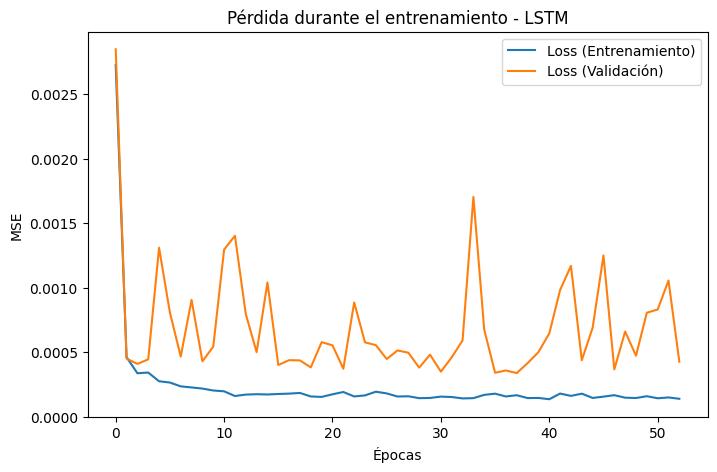

In [22]:
plot_loss(history_lstm, "LSTM")


In [23]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from tensorflow.keras.optimizers import Adam

model_gru = Sequential([
    GRU(50, return_sequences=True, input_shape=(20, 5)),
    Dropout(0.4),
    GRU(50, return_sequences=False),
    Dropout(0.4),
    Dense(50, activation='tanh'),
    Dense(1)
])

optimizer = Adam(learning_rate=0.0005)
model_gru.compile(optimizer=optimizer, loss='mse')
model_gru.summary()
history_gru = model_gru.fit(
    X_train, y_train,
    epochs=100, batch_size=64,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping]
)

y_pred_gru = model_gru.predict(X_test)
evaluar_modelo(y_test, y_pred_gru)



/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru (GRU)                            │ (None, 20, 50)              │           8,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 20, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_1 (GRU)                          │ (None, 50)                  │          15,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 26,451 (103.32 KB)

 Trainable params: 26,451 (103.32 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 7s 77ms/step - loss: 0.0123 - val_loss: 2.9062e-04
Epoch 2/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - loss: 0.0014 - val_loss: 0.0019
Epoch 3/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0010 - val_loss: 0.0011
Epoch 4/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 8.4230e-04 - val_loss: 0.0021
Epoch 5/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - loss: 7.1058e-04 - val_loss: 3.7087e-04
Epoch 6/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 6.4550e-04 - val_loss: 3.2177e-04
Epoch 7/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 4.6455e-04 - val_loss: 2.5715e-04
Epoch 8/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 4.9571e-04 - val_loss: 4.8968e-04
Epoch 9/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 3.8599e-04 - val_loss: 4.6562e-04
Epoch 10/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 3.6641e-04 - val_loss: 2.6659e-04
Epoch 11/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - loss: 3.4856e-04 - val_loss:

(0.0006482634868906244, 0.025461018968034734, 0.020661115213001614)

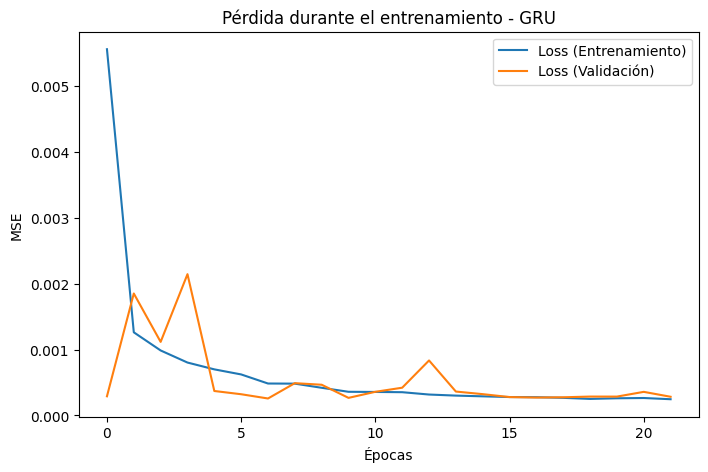

In [24]:
plot_loss(history_gru, "GRU")

Epoch 1/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 8s 109ms/step - loss: 2.7425 - val_loss: 0.0346
Epoch 2/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step - loss: 0.0519 - val_loss: 0.0916
Epoch 3/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 94ms/step - loss: 0.0392 - val_loss: 0.0670
Epoch 4/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 7s 164ms/step - loss: 0.0343 - val_loss: 0.0987
Epoch 5/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 7s 89ms/step - loss: 0.0333 - val_loss: 0.0412
Epoch 6/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 7s 137ms/step - loss: 0.0297 - val_loss: 0.0494
Epoch 7/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 115ms/step - loss: 0.0271 - val_loss: 0.0649
Epoch 8/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 111ms/step - loss: 0.0248 - val_loss: 0.0238
Epoch 9/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 83ms/step - loss: 0.0212 - val_loss: 0.0237
Epoch 10/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 92ms/step - loss: 0.0204 - val_loss: 0.0249
Epoch 11/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 6s 113ms/step - loss: 0.0184 - val_loss: 0.0637
Epoch 12/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 85m

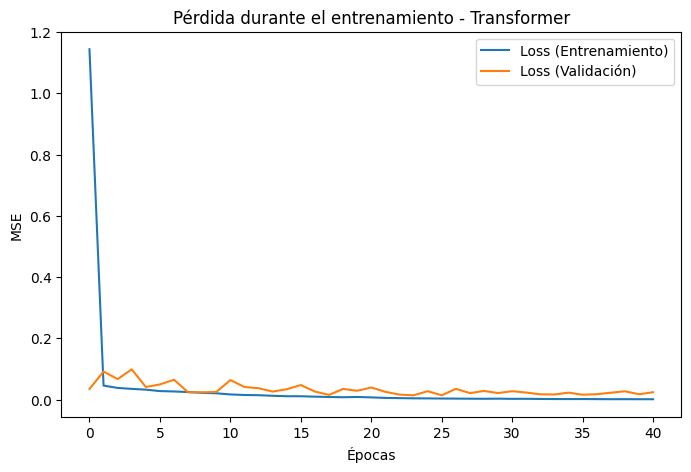

In [28]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, LayerNormalization, MultiHeadAttention, Add, Flatten
from tensorflow.keras.optimizers import Adam

seq_length = 30
num_features = 5
d_model = 64
num_heads = 4
ff_dim = 128
dropout_rate = 0.1

def transformer_encoder(inputs, d_model, num_heads, ff_dim, dropout_rate):

    x = Dense(d_model)(inputs)

    attention_output = MultiHeadAttention(num_heads=num_heads, key_dim=d_model)(x, x)
    attention_output = Dropout(dropout_rate)(attention_output)
    attention_output = Add()([x, attention_output])
    attention_output = LayerNormalization(epsilon=1e-6)(attention_output)

    ffn_output = Dense(ff_dim, activation="relu")(attention_output)
    ffn_output = Dense(d_model)(ffn_output)
    ffn_output = Dropout(dropout_rate)(ffn_output)
    ffn_output = Add()([attention_output, ffn_output])
    return LayerNormalization(epsilon=1e-6)(ffn_output)

inputs = Input(shape=(seq_length, num_features))
x = transformer_encoder(inputs, d_model, num_heads, ff_dim, dropout_rate)
x = Flatten()(x)
x = Dense(50, activation="relu")(x)
x = Dense(1)(x)

model_transformer = Model(inputs, x)

optimizer = Adam(learning_rate=0.001)
model_transformer.compile(optimizer=optimizer, loss="mse")

early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=15, restore_best_weights=True)
model_transformer.summary()
history_transformer = model_transformer.fit(
    X_train, y_train,
    epochs=100, batch_size=64,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping]
)

y_pred_transformer = model_transformer.predict(X_test)
evaluar_modelo(y_test, y_pred_transformer)

plot_loss(history_transformer, "Transformer")
